In [1]:
%pip install deap

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install cma

Note: you may need to restart the kernel to use updated packages.


# Лабораторная работа №1

In [29]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# 1. Определение целевой функции (eval_func)
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# 2. Создание инструментов (create_toolbox)
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, num_bits)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", eval_func)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

# 3. Инициализация популяции
num_bits = 100
toolbox = create_toolbox(num_bits)
population = toolbox.population(n=250)
probab_crossing, probab_mutating = 0.5, 0.2
num_generations = 60

# 4. Эволюция
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)

pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=probab_crossing, mutpb=probab_mutating,
                                   ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# 5. Вывод результатов
min_fit = min(ind.fitness.values[0] for ind in pop)
max_fit = max(ind.fitness.values[0] for ind in pop)
mean_fit = stats.compile(pop)['avg']
std_dev = stats.compile(pop)['std']

print('Min =', min_fit, ', Max =', max_fit)
print('Average =', round(mean_fit, 2), ', Standard deviation =', round(std_dev, 2))

print("\n==== End of evolution")

best_ind = hof[0]
print('\nBest individual:\n', best_ind)
print('\nNumber of ones:', sum(best_ind))

gen	nevals	avg  	std    	min	max
0  	250   	94.78	3.66982	85 	100
1  	142   	97.128	2.39157	89 	100
2  	166   	97.84 	2.0529 	91 	100
3  	156   	98.32 	1.77133	92 	100
4  	145   	98.572	1.50891	93 	100
5  	160   	98.356	1.75193	92 	100
6  	156   	98.64 	1.52263	93 	100
7  	167   	98.416	1.72132	92 	100
8  	149   	98.536	1.71368	92 	100
9  	161   	98.456	1.69472	93 	100
10 	140   	98.636	1.58981	93 	100
11 	137   	98.78 	1.65276	92 	100
12 	152   	98.62 	1.66241	93 	100
13 	135   	98.872	1.39986	94 	100
14 	151   	98.664	1.68734	92 	100
15 	148   	98.672	1.5532 	92 	100
16 	155   	98.632	1.6348 	93 	100
17 	127   	98.832	1.66966	92 	100
18 	157   	98.524	1.73246	92 	100
19 	163   	98.364	1.98985	90 	100
20 	147   	98.644	1.57901	93 	100
21 	147   	98.508	1.88731	92 	100
22 	154   	98.464	1.92476	91 	100
23 	153   	98.44 	1.91165	91 	100
24 	153   	98.368	1.87205	93 	100
25 	172   	98.424	1.84288	91 	100
26 	146   	98.3  	1.9    	91 	100
27 	147   	98.82 	1.43792	94 	100
28 	155   	98.54

# Лабораторная работа №2

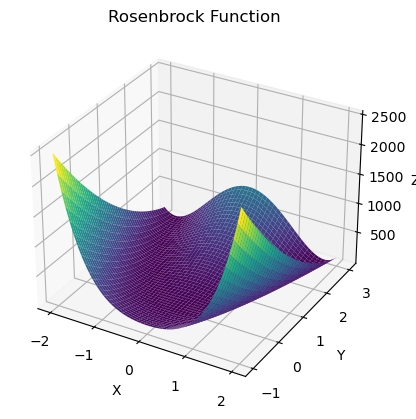

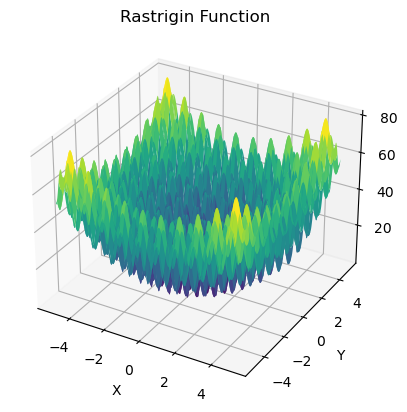

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rosenbrock():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-2, 2, 400)
    Y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(X, Y)
    Z = 100.0 * (Y - X**2)**2 + (1 - X)**2
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Rosenbrock Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def plot_rastrigin():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-5.12, 5.12, 400)
    Y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(X, Y)
    Z = 10 * 2 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Rastrigin Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_rosenbrock()
plot_rastrigin()

c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	std        	min  	avg        	max        
0  	200  	4.58574e+06	97511	4.80104e+06	3.19549e+07
1  	200  	6.84687e+06	276612	6.60724e+06	4.71281e+07
2  	200  	7.60178e+06	135378	6.77691e+06	5.91709e+07
3  	200  	4.38477e+06	58332.4	3.84455e+06	3.40196e+07
4  	200  	1.77754e+06	9051.34	1.55057e+06	1.31553e+07
5  	200  	791682     	27231.6	679405     	7.60125e+06
6  	200  	281699     	8464.41	305773     	1.85685e+06
7  	200  	159754     	7215.85	167874     	925274     
8  	200  	105716     	6996.62	98508.6    	639388     
9  	200  	51235.9    	2608.34	49986.1    	327028     
10 	200  	31057.1    	1216.77	31776.6    	223254     
11 	200  	27766.7    	1525.57	23474.9    	219099     
12 	200  	34810.5    	1180.75	18722.1    	403204     
13 	200  	10651.1    	396.894	7977.26    	124767     
14 	200  	7028.31    	606.219	7338.96    	52088.9    
15 	200  	4520.58    	221.441	4614.28    	25793.1    
16 	200  	2069.05    	140.041	2492.63    	11376      
17 	200  	1601.54    	141.15 	1871

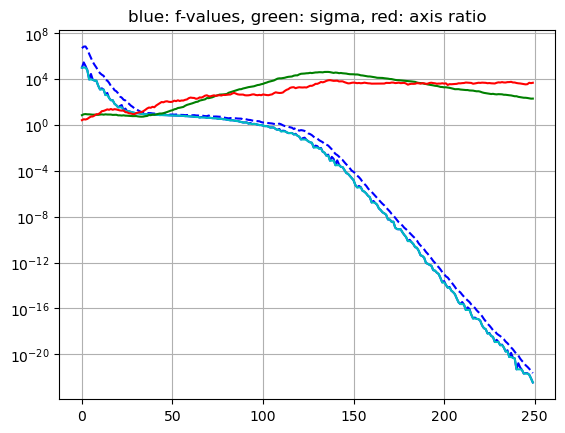

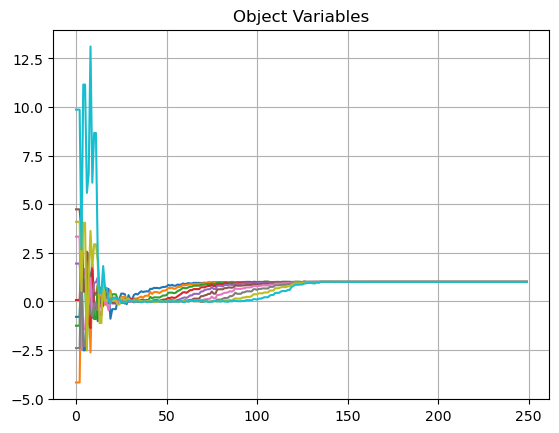

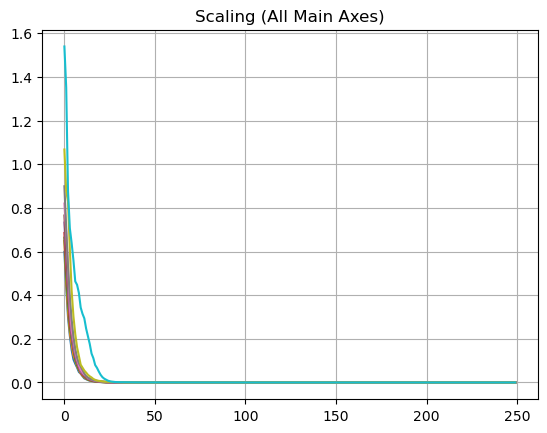

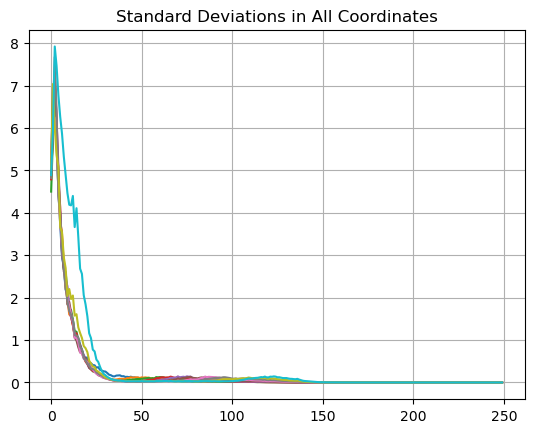

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rosenbrock)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 250

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0,
            lambda_=20*num_individuals, mu = int(20*num_individuals/2))

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Update the strategy with the evaluated individuals
        toolbox.update(population)

        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

        print(logbook.stream)

        # Save more data along the evolution
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, num_generations))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.plot(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()

gen	evals	std    	min    	avg    	max    
0  	90   	127.239	93.8547	295.632	670.646
1  	90   	197.001	31.8484	290.543	962.069
2  	90   	99.3895	66.3229	213.589	498.738
3  	90   	76.326 	54.5318	150.244	500.082
4  	90   	39.5445	45.1158	107.668	224.104
5  	90   	29.2919	28.211 	90.2232	165.149
6  	90   	19.2397	29.1471	66.1792	135.061
7  	90   	18.5883	17.9758	61.5748	106.447
8  	90   	15.9412	23.1563	58.6696	93.3347
9  	90   	17.4601	17.6545	58.1563	102.159
10 	90   	18.4207	18.6946	57.5307	102.031
11 	90   	14.7658	22.1361	57.1454	94.4052
12 	90   	15.265 	14.6973	53.0476	89.7484
13 	90   	14.4449	15.2485	52.0861	85.7176
14 	90   	15.8413	13.5341	56.2222	94.0389
15 	90   	16.9914	11.7664	52.3047	94.6047
16 	90   	16.0367	18.6597	53.5501	89.3676
17 	90   	15.3791	14.6625	53.1518	88.3896
18 	90   	16.5239	24.232 	54.5213	89.5309
19 	90   	19.2321	11.5163	52.5487	102.697
20 	90   	17.0068	10.4565	51.8788	86.6941
21 	90   	14.0476	25.2857	54.9557	88.6559
22 	90   	16.8166	12.4448	51.6545	

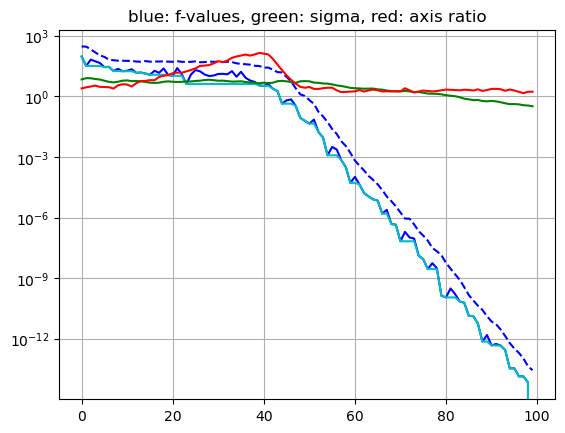

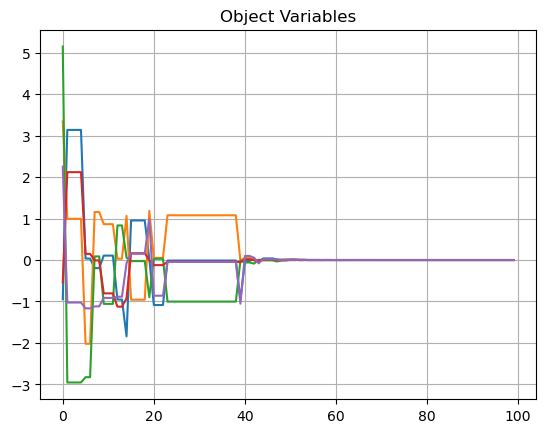

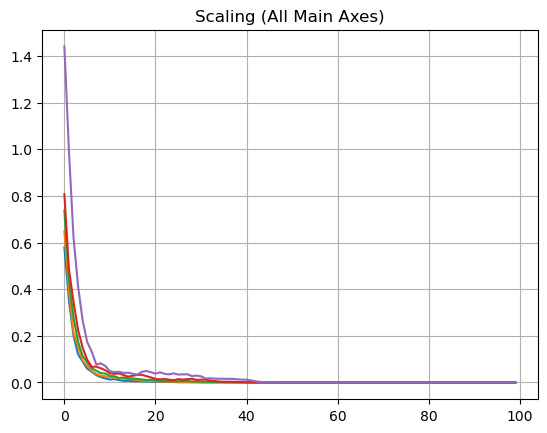

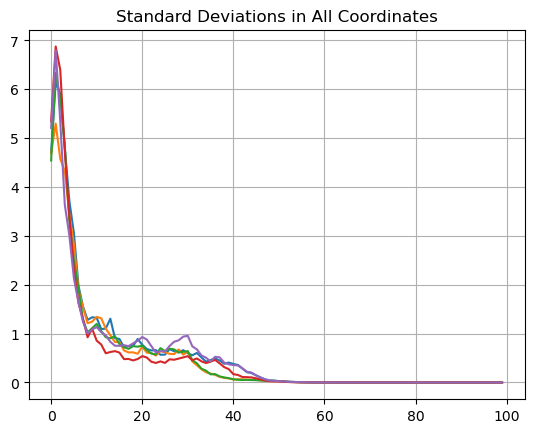

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)

    # Seeed the random number generator
    np.random.seed(40)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 5
    num_generations = 100

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0,
            lambda_=18*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Update the strategy with the evaluated individuals
        toolbox.update(population)

        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

        print(logbook.stream)

        # Save more data along the evolution
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, num_generations))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.plot(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()

c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	std    	min    	avg    	max    
0  	400  	7.95686	59.7854	82.7299	105.031
1  	400  	8.68035	56.1874	83.1302	107.684
2  	400  	9.24407	64.9766	87.8367	115.858
3  	400  	9.53715	61.3999	88.2826	116.454
4  	400  	9.07862	61.7854	86.7121	113.555
5  	400  	8.94519	61.6679	83.6203	113.819
6  	400  	8.61806	54.9494	80.7759	110.706
7  	400  	8.14924	58.2815	78.4086	103.614
8  	400  	8.03025	52.4702	76.0736	100.63 
9  	400  	8.18852	47.1222	74.6398	114.743
10 	400  	7.41849	49.0195	69.3489	93.9376
11 	400  	7.10651	41.1718	66.5687	90.9185
12 	400  	7.19773	45.0487	64.7764	85.5547
13 	400  	6.63044	44.2747	61.6848	84.5338
14 	400  	6.36056	39.2842	58.7847	80.3934
15 	400  	6.02835	33.5435	56.4167	73.8659
16 	400  	5.7989 	39.0199	53.1557	71.1169
17 	400  	5.76204	34.439 	50.0161	65.0355
18 	400  	5.10951	34.8331	48.092 	63.2658
19 	400  	4.74197	30.2081	46.8832	59.4563
20 	400  	5.13147	30.1892	46.4766	58.8247
21 	400  	4.80741	30.834 	44.5   	59.2425
22 	400  	4.31723	32.0251	42.8191	

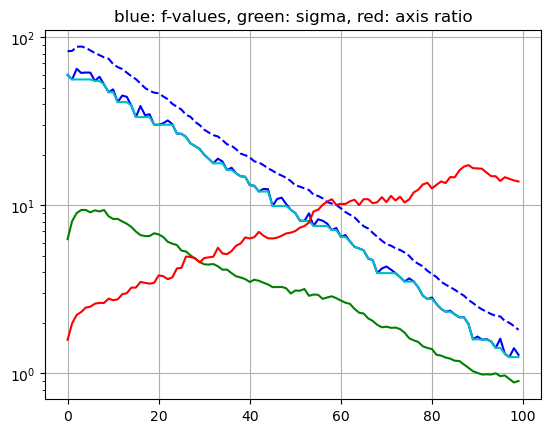

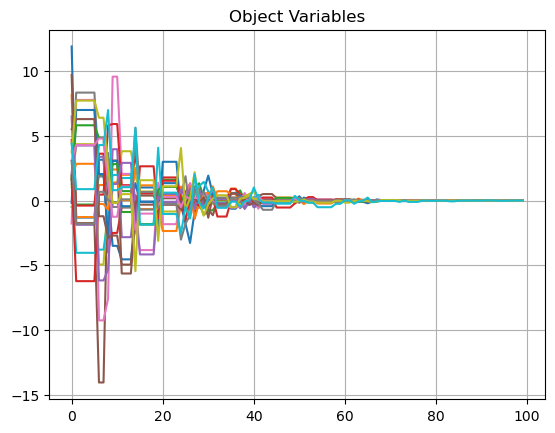

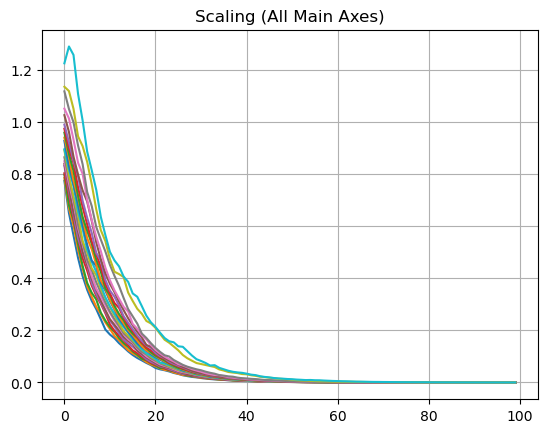

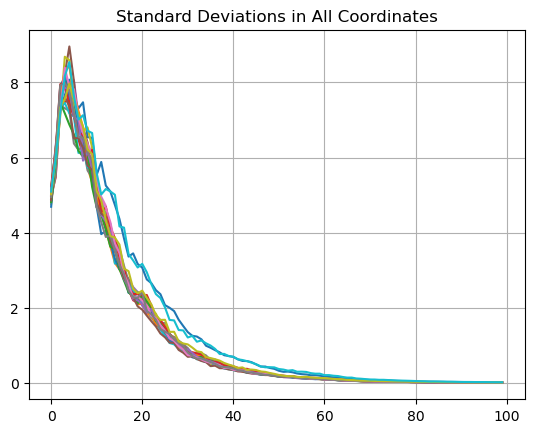

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Функция для создания toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    # toolbox.register("evaluate", benchmarks.rastrigin)
    toolbox.register("evaluate", benchmarks.schaffer)

    # Установка начального значения генератора случайных чисел
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Размер задачи
    num_individuals = 20
    num_generations = 100

    # Создание стратегии с использованием алгоритма CMA-ES
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0,
            lambda_=20*num_individuals)

    # Создание toolbox на основе вышеуказанной стратегии
    toolbox = create_toolbox(strategy)

    # Создание объекта зала славы
    hall_of_fame = tools.HallOfFame(1)

    # Регистрация соответствующей статистики
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    # Объекты для сбора данных
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations, 1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Генерация новой популяции
        population = toolbox.generate()

        # Оценка индивидуумов
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Обновление стратегии с оцененными индивидуумами
        toolbox.update(population)

        # Обновление зала славы и статистики текущей популяцией
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

        print(logbook.stream)

        # Сохранение дополнительных данных в процессе эволюции
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # Ось x будет числом поколений
    x = list(range(0, num_generations))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.plot(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()

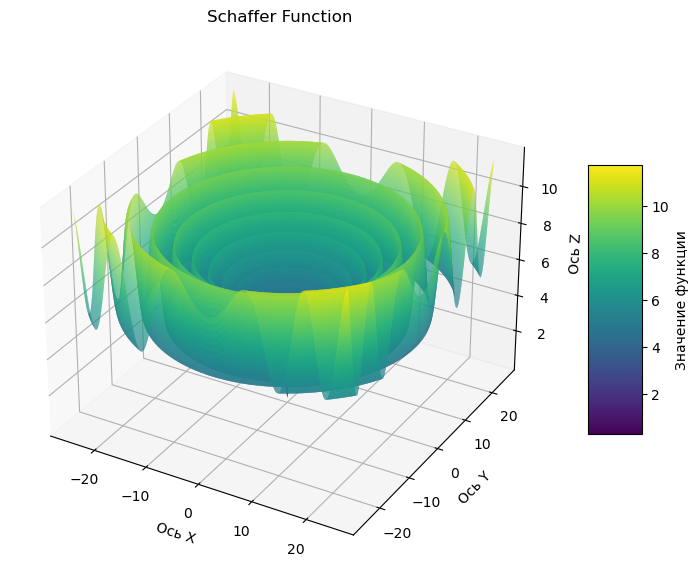

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from deap import benchmarks

# Функция для вычисления значения функции Шаффера
def schaffer_arg0(sol):
    return benchmarks.schaffer(sol)[0]

# Создание фигуры и осей
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Определение диапазонов для X и Y
X = np.arange(-25, 25, 0.1)
Y = np.arange(-25, 25, 0.1)
X, Y = np.meshgrid(X, Y)

# Вычисление значений функции Шаффера
Z = np.fromiter(map(schaffer_arg0, zip(X.flat, Y.flat)), dtype=float, count=X.shape[0]*X.shape[1]).reshape(X.shape)

# Построение поверхности
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', linewidth=0.2, antialiased=True)
# Добавление цветовой шкалы
fig.colorbar(surf, shrink=0.5, aspect=5, label='Значение функции')

# Настройка меток осей
ax.set_xlabel("Ось X")
ax.set_ylabel("Ось Y")
ax.set_zlabel("Ось Z")
ax.set_title("Schaffer Function")

# Показ графика
plt.show()

# Лабораторная работа №3

gen	nevals	min     	avg    
0  	1000  	0.077887	135.139
1  	900   	0.077887	62.2171
2  	901   	0.069348	32.7963
3  	890   	0.032433	19.7964
4  	904   	0.029025	15.7549
5  	900   	0.00800743	14.014 
6  	909   	0.00493489	14.2818
7  	885   	0.00493489	12.853 
8  	900   	0.00493489	11.4896
9  	886   	0.00493489	12.2397
10 	906   	0.000616218	12.7301
[3.004098612690486, 1.9952439348522966]


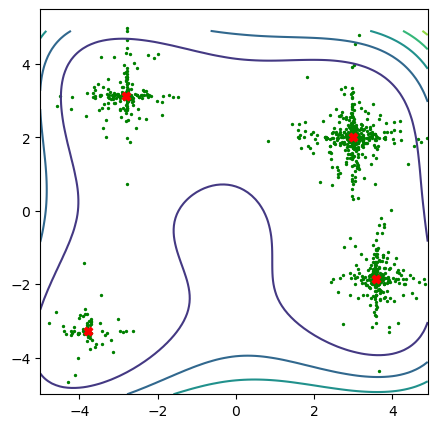

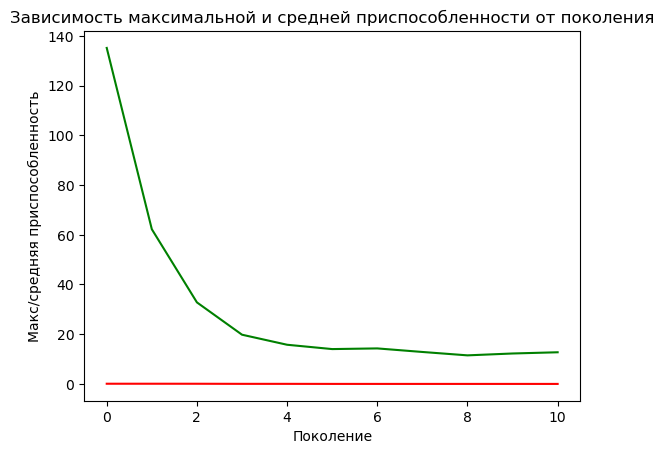

In [7]:
from deap import tools
from deap.algorithms import varAnd


def eaSimpleElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__, callback=None):
    """Перелеланный алгоритм eaSimple с элементом элитизма
    """

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

        if callback:
            callback[0](*callback[1])

    return population, logbook

from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

LOW, UP = -5, 5
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 1000   # количество индивидуумов в популяции
P_CROSSOVER = 0.02       # вероятность скрещивания
P_MUTATION = 0.9        # вероятность мутации индивидуума
MAX_GENERATIONS = 10    # максимальное количество поколений
HALL_OF_FAME_SIZE = 5

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]


toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def himmelblau(individual):
    x, y = individual
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,

toolbox.register("evaluate", himmelblau)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]

    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.2)


x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xgrid, ygrid = np.meshgrid(x, y)

f_himmelbalu = (xgrid**2 + ygrid - 11)**2 + (xgrid + ygrid**2 - 7)**2

plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)

population, logbook = eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        callback=(show, (ax, xgrid, ygrid, f_himmelbalu)),
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

gen	nevals	min     	avg    
0  	200   	-938.344	12.4971
1  	175   	-938.344	-127.657
2  	176   	-938.344	-245.707
3  	172   	-938.344	-303.099
4  	181   	-938.344	-328.951
5  	172   	-938.344	-421.137
6  	179   	-951.492	-498.84 
7  	179   	-951.492	-456.639
8  	177   	-951.492	-541.317
9  	177   	-951.492	-540.073
10 	174   	-955.122	-503.042
11 	178   	-955.122	-517.967
12 	172   	-958.135	-538.787
13 	176   	-958.753	-542.845
14 	172   	-958.753	-577.407
15 	175   	-958.753	-571.043
16 	178   	-958.855	-500.128
17 	172   	-959.205	-534.217
18 	181   	-959.205	-575.444
19 	175   	-959.327	-608.974
20 	172   	-959.546	-619.623
21 	176   	-959.546	-633.295
22 	177   	-959.55 	-643.468
23 	179   	-959.563	-630.319
24 	165   	-959.593	-672.589
25 	172   	-959.606	-647.112
26 	180   	-959.606	-607.789
27 	177   	-959.606	-641.582
28 	178   	-959.608	-657.997
29 	176   	-959.608	-624.53 
30 	170   	-959.636	-604.027
31 	175   	-959.64 	-647.623
32 	165   	-959.64 	-667.737
33 	177   	-959.

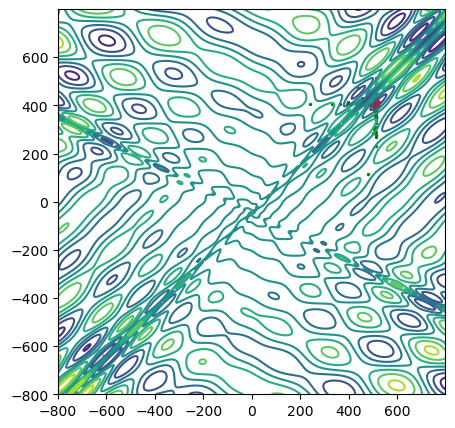

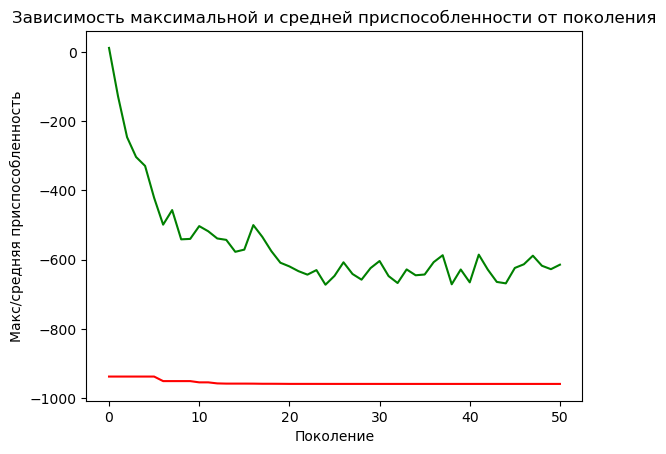

In [18]:
from deap import tools
from deap.algorithms import varAnd

def eaSimpleElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
                    halloffame=None, verbose=__debug__, callback=None):
    """Перелеланный алгоритм eaSimple с элементом элитизма"""

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

        if callback:
            callback[0](*callback[1])

    return population, logbook

from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

LOW, UP = -512, 512
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.5       # вероятность скрещивания
P_MUTATION = 0.8       # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений
HALL_OF_FAME_SIZE = 5

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]


toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def eggholder(individual):
    x, y = individual
    f = (-(y + 47) * np.sin(np.sqrt(abs(x/2 + (y + 47)))) -x * np.sin(np.sqrt(abs(x - (y + 47)))))
    return f,

toolbox.register("evaluate", eggholder)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[512, 404], ]

    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)

    plt.draw()
    plt.gcf().canvas.flush_events()



x = np.arange(-800, 800, 1)
y = np.arange(-800, 800, 1)
xgrid, ygrid = np.meshgrid(x, y)

f_eggholder= (-(ygrid + 47) * np.sin(np.sqrt(abs(xgrid/2 + (ygrid + 47)))) -xgrid * np.sin(np.sqrt(abs(xgrid - (ygrid + 47)))))

plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)

#algelitism.eaSimpleElitism
#algorithms.eaSimple
population, logbook = eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        callback=(show, (ax, xgrid, ygrid, f_eggholder)),
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

Minimum of Himmelblau's function: [ 3.58442834 -1.84812653] with value 1.34106353887572e-29
Minimum of Eggholder's function: [-456.8859014  -382.62347105] with value -786.5259940772887


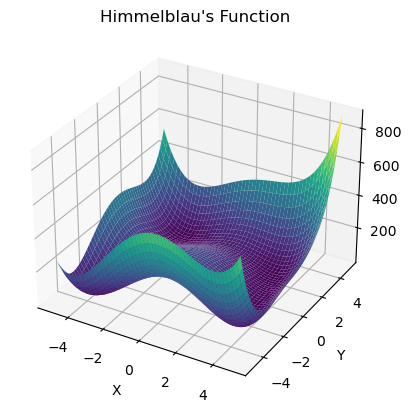

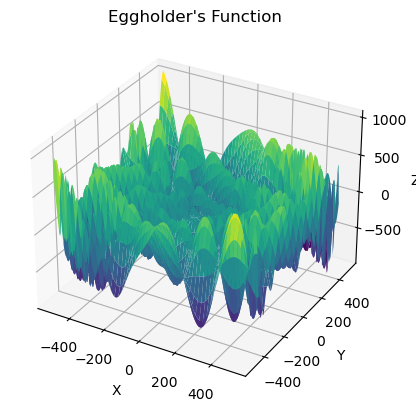

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Определение функции Химмельблау
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Определение функции Эггхолдера
def eggholder(x):
    return -(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47))))

# Поиск экстремума с помощью дифференциальной эволюции
def find_minima(func, bounds):
    result = differential_evolution(func, bounds)
    return result.x, result.fun

# Построение 3D-графика функции
def plot_function(func, bounds, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X = np.linspace(bounds[0][0], bounds[0][1], 400)
    Y = np.linspace(bounds[1][0], bounds[1][1], 400)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([func([x, y]) for x, y in zip(X.flatten(), Y.flatten())])
    Z = Z.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Параметры для функции Химмельблау
bounds_himmelblau = [(-5, 5), (-5, 5)]
minima_himmelblau, value_himmelblau = find_minima(himmelblau, bounds_himmelblau)

# Параметры для функции Эггхолдера
bounds_eggholder = [(-512, 512), (-512, 512)]
minima_eggholder, value_eggholder = find_minima(eggholder, bounds_eggholder)

print(f"Minimum of Himmelblau's function: {minima_himmelblau} with value {value_himmelblau}")
print(f"Minimum of Eggholder's function: {minima_eggholder} with value {value_eggholder}")

# Построение графиков
plot_function(himmelblau, bounds_himmelblau, "Himmelblau's Function")
plot_function(eggholder, bounds_eggholder, "Eggholder's Function")


# Лабораторная работа №4

In [112]:
#Решение задачи символической регрессии
import operator
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (math.cos(x) - 3*math.sin(0.7*x) + 0.5*x)) ** 2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-100,100)]) #Измененная строка чтобы сос старыми значениями мутации и еще одного графики совпали
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.35 #изменение с 0.4 до 0.87 для графика
    probab_mutate = 0.4
    num_generations = 100 #изменение с 60  до 100 для графика

    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max   	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	450   	1389.86	0  	566957	9.68857	450   	26696.8	3.73556	0  	7  	2  	450   	1.62449
1  	243   	385.315	1  	142224	9.53123	243   	6702.97	3.82444	1  	12 	1  	243   	2.06942
2  	288   	742.104	2  	150313	9.53123	288   	9842.31	4.1    	2  	12 	1  	288   	2.21133
3  	268   	248.813	3  	74854.1	9.53123	268   	3538.86	4.16889	3  	17 	1  	268   	2.33674
4  	283   	42908.9	4  	1.92677e+07	9.53123	283   	907275 	4.34222	4  	17 	1  	283   	2.60482
5  	296   	402.606	5  	140579     	9.52636	296   	6633.84	4.29556	5  	17 	1  	296   	2.75104
6  	286   	63.8666	6  	2210.8     	9.18751	286   	304.11 	4.45333	6  	13 	1  	286   	2.89809
7  	261   	59.1748	7  	2101.08    	6.61574	261   	287.507	4.82   	

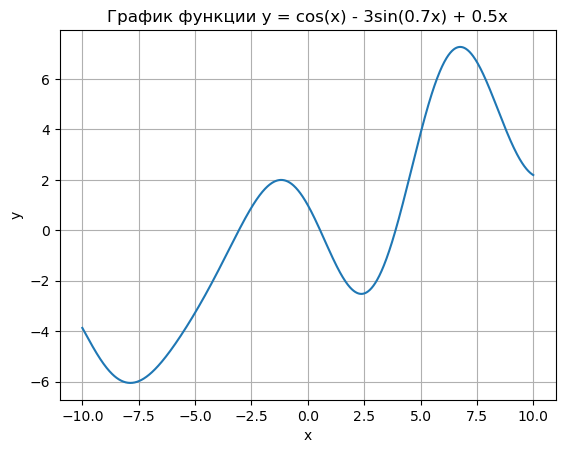

In [113]:
#График подобной функции, как из тимс
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.cos(x) - 3*np.sin(0.7*x) + 0.5*x

x = np.linspace(-10, 10, 1000)
y = func(x)
plt.plot(x, y)
plt.title('График функции y = cos(x) - 3sin(0.7x) + 0.5x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

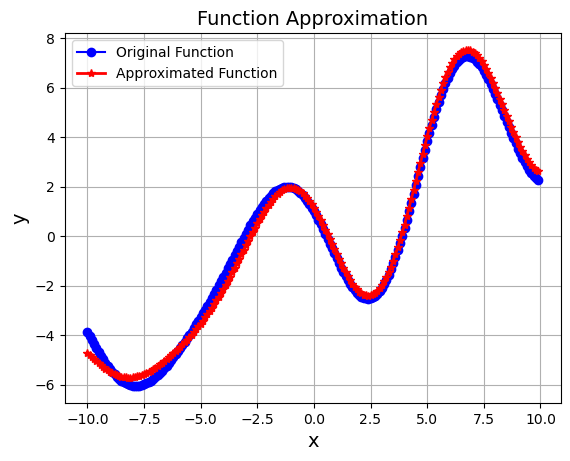

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

best_individual = hall_of_fame[0]
best_function = toolbox.compile(best_individual)

data = {'x': [], 'y': []}
for i in np.arange(-10.0, 10.0, 0.1):
    x = round(i, 2)
    y = math.cos(x) - 3*math.sin(0.7*x) + 0.5*x
    data['x'].append(x)
    data['y'].append(y)

points = {'x': [], 'y': []}
for i in np.arange(-10.0, 10.0, 0.1):
    x1 = round(i, 2)
    y1 = best_function(x1)
    points['x'].append(x1)
    points['y'].append(y1)

df1 = pd.DataFrame(data)
df = pd.DataFrame(points)

plt.plot(df1['x'], df1['y'], color='blue', marker='o', label='Original Function')
plt.plot(df['x'], df['y'], color='red', marker='*', linewidth=2, label='Approximated Function')
plt.title('Function Approximation', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
%pip install networkx

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.7 MB 1.7 MB/s eta 0:00:01
     ------- -------------------------------- 0.3/1.7 MB 2.5 MB/s eta 0:00:01
     ------------- -------------------------- 0.6/1.7 MB 3.3 MB/s eta 0:00:01
     --------------------- ------------------ 0.9/1.7 MB 4.1 MB/s eta 0:00:01
     -------------------------------- ------- 1.4/1.7 MB 5.2 MB/s eta 0:00:01
     -------------------------------------- - 1.6/1.7 MB 5.4 MB/s eta 0:00:01
     -------------------------------------- - 1.6/1.7 MB 5.4 MB/s eta 0:00:01
     -------------------------------------- - 1.6/1.7 MB 5.4 MB/s eta 0:00:01
     -------------------------------------- - 1.6/1.7 MB 3.7 MB/s eta 0:00:01
     -------------------------------------- - 1.6/1.7 MB 3.7 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 3.2 MB/s eta 0

Количество ребер:  63
Количество вершин:  64


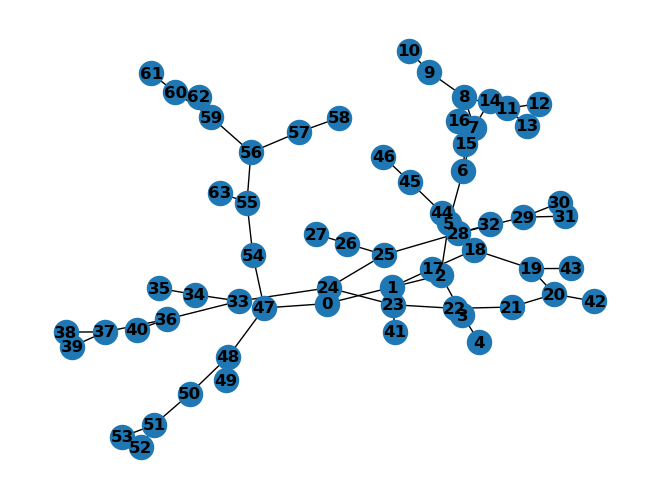

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [(0, 1), (1, 2), (2, 3), (3, 4), (2, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (8, 11), (11, 12), (11, 13), (7, 14), (6, 15), (15, 16), (1, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (25, 28), (28, 29), (29, 30), (29, 31), (28, 32), (24, 33), (33, 34), (34, 35), (33, 36), (36, 37), (37, 38), (37, 39), (36, 40), (23, 41), (20, 42), (19, 43), (18, 44), (44, 45), (45, 46), (0, 47), (47, 48), (48, 49), (48, 50), (50, 51), (51, 52), (51, 53), (47, 54), (54, 55), (55, 56), (56, 57), (57, 58), (56, 59), (59, 60), (60, 61), (59, 62), (55, 63)], {0: 'add', 1: 'add', 2: 'add', 3: 'cos', 4: 'x', 5: 'cos', 6: 'division_operator', 7: 'sub', 8: 'mul', 9: 'cos', 10: 1, 11: 'sub', 12: 'x', 13:

In [115]:
import matplotlib.pyplot as plt
import networkx as nx 

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])
print(gp.graph(hall_of_fame[0]))
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)

# Лабораторная работа №5-6

In [14]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp
def firstfunc(x, y):
  return (25*np.cos(y) - x**2) 
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator

def eval_func(individual):
    func = toolbox.compile(expr=individual)

    points = []
    for x in range(-10, 11):
      for y in range(-10, 11):
        points.append((x, y))
    mse = ((func(x,y) - firstfunc(x, y))**2 for x, y in points)

    return math.fsum(mse) / len(points),
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 2)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x', ARG1='y')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox
if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    probab_crossover = 0.25
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)

c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\smirn\anaconda3\envs\myenv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                       fitness                        	                      size                     
   	      	------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max        	min    	nevals	std   	avg	gen	max	min	nevals	std    
0  	450   	18681.8	0  	6.91162e+06	301.636	450   	325328	3.6	0  	7  	2  	450   	1.57762
1  	202   	2910.6 	1  	10298.3    	301.636	202   	634.582	3.53333	1  	11 	1  	202   	1.74356
2  	201   	3066.28	2  	91332.5    	301.636	201   	4210.34	3.78   	2  	12 	1  	201   	2.0029 
3  	175   	2838.46	3  	10371.7    	301.636	175   	798.394	4.09333	3  	12 	1  	175   	2.00116
4  	181   	2878.81	4  	91364.6    	301.636	181   	4285.74	4.35333	4  	13 	1  	181   	2.02694
5  	195   	4133.7 	5  	191320     	301.636	195   	16541.7	4.88667	5  	14 	1  	195   	2.33772
6  	185   	67007.6	6  	2.76377e+07	301.636	185   	1.30136e+06	5.45111	6  	13 	1  	185   	2.29271
7  	178   	3992.91	7  	191320     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


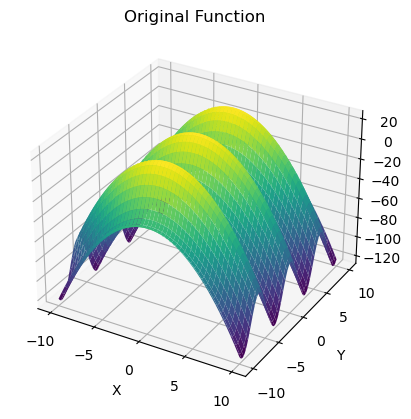

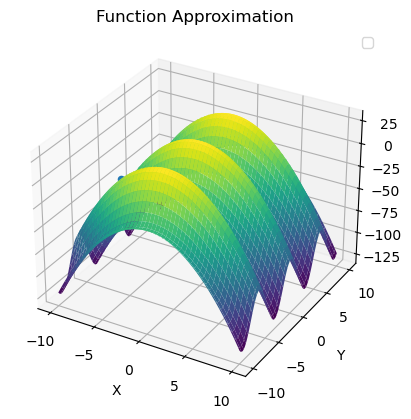

In [16]:
import random
from deap import base, creator, tools
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определение функции для аппроксимации
def f(x, y):
    return (25*np.cos(y) - x**2) 

# Определение цели алгоритма (минимизация или максимизация)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

#Новые значения


def evaluate(individual):
    x, y = individual
    return abs(f(x, y)),

toolbox.register("evaluate", evaluate)

def main():
    population = toolbox.population(n=50)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 200


    #print("Start of evolution")

    # Оценка всех особей в начальной популяции
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    #print("  Evaluated %i individuals" % len(population))

    for gen in range(NGEN):
        #print("-- Generation %i --" % gen)

        # Выбор лучших особей для размножения
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Скрещивание
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Мутация
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Оценка новой популяции
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        #print("  Evaluated %i individuals" % len(invalid_ind))

        # Объединение старой и новой популяций
        population[:] = offspring

        # Получение оценок всех особей в популяции
        fits = [ind.fitness.values[0] for ind in population]

    #print("-- End of evolution --")

    best_ind = tools.selBest(population, 1)[0]
    #print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

    # Графическое представление функции и её аппроксимации
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title('Original Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    best_x, best_y = best_ind
    best_z = f(best_x, best_y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')


    ax.scatter(best_x, best_y, best_z)
    ax.set_title('Function Approximation')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()

# Лабораторная работа №7

In [22]:
import random
import copy
from functools import partial
from deap import base, creator, tools, algorithms, gp
import numpy as np

class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None
        self.moves_done = []
        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]

    def _reset(self):
        self.row = self.row_start
        self.col = self.col_start
        self.direction = 1
        self.moves = 0
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.moves_done = []

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4
            self.moves_done.append("turn left")

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction + 1) % 4
            self.moves_done.append("turn right")

    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col
            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1
            self.matrix_exc[self.row][self.col] = "passed"
            self.moves_done.append("move_forward")

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "target"

    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)

    def run(self, routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()

    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())
            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2):
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):
        return partial(self._progn, out1, out2, out3)

def eval_func(individual):
    global robot, pset
    routine = gp.compile(individual, pset)
    robot.run(routine)
    return robot.consumed,

def create_toolbox():
    global robot, pset
    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
    return toolbox

if __name__ == "__main__":
    global robot
    random.seed(7)
    max_moves = 2500
    robot = RobotController(max_moves)
    toolbox = create_toolbox()
    with open('target_map.txt', 'r') as f:
        robot.traverse_map(f)
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    probab_crossover = 0.865
    probab_mutate = 0.24
    num_generations = 50
    algorithms.eaSimple(population, toolbox, probab_crossover, probab_mutate, num_generations, stats, halloffame=hall_of_fame)

gen	nevals	avg  	std    	min	max
0  	400   	1.515	4.49275	0  	62 
1  	355   	4.4475	10.1241	0  	90 
2  	372   	7.8675	15.0531	0  	96 
3  	370   	11.345	19.2384	0  	96 
4  	358   	20.85 	27.0968	0  	111
5  	359   	30.3675	35.0056	0  	111
6  	365   	34.6875	39.1111	0  	121
7  	365   	39.9075	42.7119	0  	123
8  	363   	51.105 	46.585 	0  	123
9  	360   	54.5925	48.3774	0  	123
10 	360   	52.52  	50.2651	0  	123
11 	363   	54.33  	50.7606	0  	123
12 	367   	57.6875	51.8593	0  	124
13 	347   	57.58  	52.9955	0  	124
14 	366   	52.73  	53.8741	0  	124
15 	350   	57.9825	54.05  	0  	124
16 	357   	56.9775	54.4351	0  	124
17 	367   	58.5725	54.6287	0  	124
18 	356   	59.9625	55.5543	0  	124
19 	362   	57.6425	54.834 	0  	124
20 	350   	62.795 	54.3089	0  	124
21 	371   	54.6475	55.67  	0  	124
22 	337   	73.885 	55.6661	0  	124
23 	351   	68.0075	55.8749	0  	124
24 	357   	70.045 	55.4982	0  	124
25 	364   	66.1525	56.0286	0  	124
26 	347   	76.63  	55.1599	0  	124
27 	358   	74.7325	56.4253	0

# Лабораторная работа №8

gen	nevals	min	avg    
0  	500   	513	1626.43
1  	84    	448	1260.77
2  	67    	448	1003.57
3  	68    	448	833.274
4  	64    	431	686.346
5  	77    	417	611.698
6  	64    	221	525.438
7  	79    	221	478.412
8  	85    	131	458.606
9  	103   	131	464.538
10 	60    	131	398.048
11 	82    	131	346.15 
12 	88    	131	280.642
13 	76    	131	237.218
14 	72    	129	235.254
15 	98    	125	244.728
16 	77    	125	203.99 
17 	72    	121	154.36 
18 	69    	121	139.05 
19 	113   	121	152.886
20 	81    	121	152.602
[[0, 5, 2, 6, 4, 1, 3], [1, 6, 3, 5, 0, 2, 4], [2, 4, 0, 3, 6, 5, 1], [0, 3, 5, 6, 4, 1, 2], [2, 4, 5, 0, 6, 1, 3], [2, 5, 3, 0, 4, 6, 1], [6, 3, 5, 2, 1, 4, 0]]


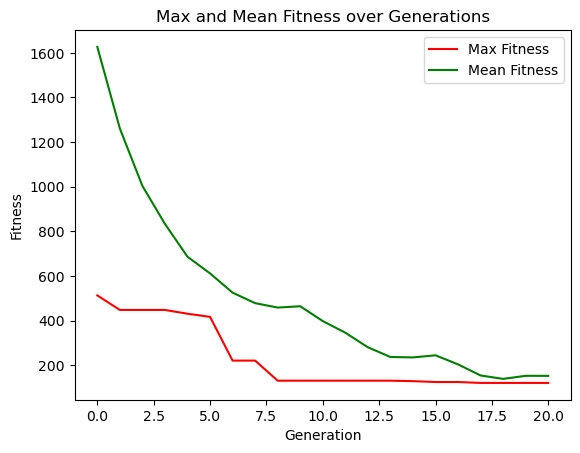

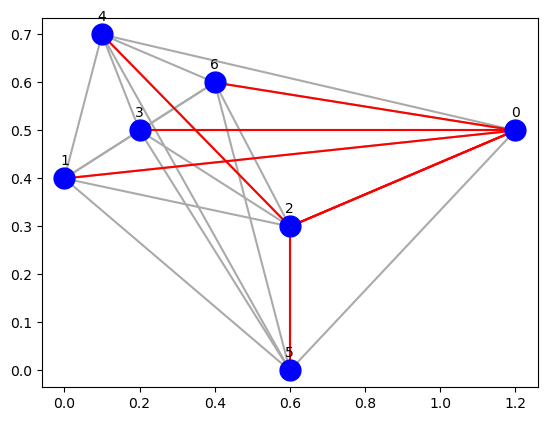

In [27]:
from matplotlib.lines import Line2D
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, algorithms, creator, tools

# Увеличиваем количество вершин
vertex = ((1.2, 0.5), (0, 0.4), (0.6, 0.3), (0.2, 0.5), (0.1, 0.7), (0.6, 0), (0.4, 0.6))

vx = [v[0] for v in vertex]
vy = [v[1] for v in vertex]

# Функция для отображения графа
def show_graph(ax, best):
    # Добавляем ребра между вершинами
    for i in range(len(vertex)):
        for j in range(i + 1, len(vertex)):
            ax.add_line(Line2D((vertex[i][0], vertex[j][0]), (vertex[i][1], vertex[j][1]), color='#aaa'))

    # Добавляем ребра, соответствующие пути
    startV = 0
    for i, v in enumerate(best):
        if i == 0:
            continue

        prev = startV
        v = v[:v.index(i)+1]
        for j in v:
            ax.add_line(Line2D((vertex[prev][0], vertex[j][0]), (vertex[prev][1], vertex[j][1]), color='r'))
            prev = j

    ax.plot(vx, vy, ' ob', markersize=15)

    # Нумерация узлов
    for i, (x, y) in enumerate(vertex):
        ax.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

inf = 100
# Обновляем матрицу смежности D
D = ((0, 3, 1, 3, inf, inf, inf),
     (3, 0, 4, inf, inf, inf, inf),
     (1, 4, 0, inf, 7, 5, inf),
     (3, inf, inf, 0, inf, 2, inf),
     (inf, inf, 7, inf, 0, 4, inf),
     (inf, inf, 5, 2, 4, 0, inf),
     (inf, inf, inf, inf, inf, inf, 0))

startV = 0              # стартовая вершина
LENGTH_D = len(D)
LENGTH_CHROM = len(D)*len(D[0])    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 500   # количество индивидуумов в популяции
P_CROSSOVER = 0.8       # вероятность скрещивания
P_MUTATION = 0.3        # вероятность мутации индивидуума
MAX_GENERATIONS = 20    # максимальное количество поколений
HALL_OF_FAME_SIZE = 1

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("randomOrder", random.sample, range(LENGTH_D), LENGTH_D)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_D)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n)+1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,         # кортеж

def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,

toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0/LENGTH_CHROM/10)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER/LENGTH_D,
                                        mutpb=P_MUTATION/LENGTH_D,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.plot(maxFitnessValues, color='red', label='Max Fitness')
plt.plot(meanFitnessValues, color='green', label='Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Max and Mean Fitness over Generations')
plt.legend()
plt.show()

fig, ax = plt.subplots()
show_graph(ax, best)
plt.show()